In [1]:

import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
#from keras.layers.normalization import * #BatchNormalization
from keras.layers import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
ruta_train = 'CarneDataset/train'
ruta_test = 'CarneDataset/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(ruta_train, target_size=(224,224), classes=['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(ruta_test, target_size=(224,224), classes=['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08'], batch_size=4)

Found 1633 images belonging to 8 classes.
Found 810 images belonging to 8 classes.


In [4]:
def plots(ims, figsize=(20,6), rows=2, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')


In [5]:
imgs, labels = next(train_batches)

C:\Users\Cverduga\anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


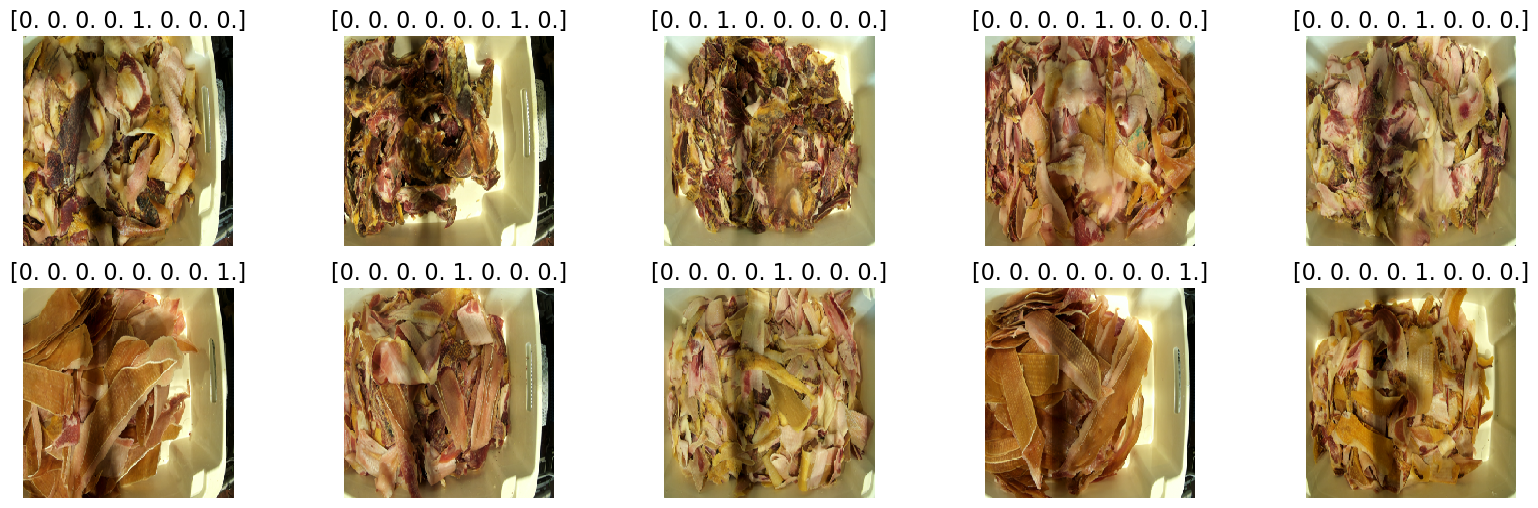

In [6]:
plots(imgs, titles=labels)

In [7]:
train_batches.class_indices

{'CLASS_01': 0,
 'CLASS_02': 1,
 'CLASS_03': 2,
 'CLASS_04': 3,
 'CLASS_05': 4,
 'CLASS_06': 5,
 'CLASS_07': 6,
 'CLASS_08': 7}

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [ ]:
vgg16_model = keras.applications.vgg16.VGG16()

In [ ]:
vgg16_model.summary()

In [ ]:
type(vgg16_model)

In [ ]:
keras.src.engine.training.Model

In [ ]:
model = Sequential()
for i in vgg16_model.layers:
    model.add(i)


In [ ]:
model.summary()

In [ ]:
model.layers.pop()
model.summary()

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
model.add(Dense(8, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_batches, steps_per_epoch=1, validation_data=test_batches, validation_steps=10, epochs=10, verbose=2)

In [ ]:
model.save_weights('model_weights.h5')

In [ ]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)
print(test_labels)
predictions = model.predict_on_batch(np.array(test_imgs))
print(predictions)
test_labels = np.array(test_labels.argmax(axis=1))
predictions = np.array(predictions.argmax(axis=1))


In [ ]:
print(test_labels)
print(predictions)


In [ ]:
cm = confusion_matrix(test_labels, predictions)

In [ ]:
cm_plot_labels = ['CLASE1', 'CLASE2', 'CLASE3', 'CLASE4', 'CLASE5', 'CLASE6', 'CLASE7', 'CLASE8']
if 0 not in test_labels and 0 not in predictions:
    cm_plot_labels.remove('CLASE1')
if 1 not in test_labels and 1 not in predictions:
    cm_plot_labels.remove('CLASE2')
if 2 not in test_labels and 2 not in predictions:
    cm_plot_labels.remove('CLASE3')
if 3 not in test_labels and 3 not in predictions:
    cm_plot_labels.remove('CLASE4')
if 4 not in test_labels and 4 not in predictions:
    cm_plot_labels.remove('CLASE5')
if 5 not in test_labels and 5 not in predictions:
    cm_plot_labels.remove('CLASE6')
if 6 not in test_labels and 6 not in predictions:
    cm_plot_labels.remove('CLASE7')
if 7 not in test_labels and 7 not in predictions:
    cm_plot_labels.remove('CLASE8')

In [ ]:
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')